# # **Diversity, Equity, Inclusion, and Belonging (DEIB) Analysis In WorkForce**

### From: 2025-Srping-MBAN2 Weiakng Yang
- Group member:Abi Joshua GEORGE / Eri Yoshimoto / Hakeem GARCIA /Nattida TAVAROJN / Neha NAGABHUSHAN / Weikang YANG
## Overview
- file path: `./original_data.csv`
- The theme of "Diversity, Equity, Inclusion, and Belonging (DEIB)" is an important element of workplaces today because they make sure that all employees have an equal opportunity regardless of gender, ethnicity, or origin. The organizations that prioritize DEIB tend to build a more inclusive culture, which leads to higher employee satisfaction, greater productivity, and improved business performance. Analysis of data, however, is required to understand the trends in DEIB so that gaps and future trends can be researched.

- This analysis uses statistical and machine learning techniques to analyze workforce diversity data in the form of salary trends across employment industry and demographic category. Time-series forecasting is applied in order to project future salary distributions and compare the possible differences in workplace compensation.



## **Part 1: Import & Clean the data**
---
1. import the data from the file as a data frame.
2. Standardize the data type.
3. Filter the dataset with the value that we need.
    - we need the data for Canada
4. Drop the unnecessary column.
5. Reset the index.
6. Save the cleaned dataset.
7. Check the dataset to makesure everthing is good at the end.

In [2]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# load the data
file_path = "original_data.csv"
df = pd.read_csv(file_path)

print(df.head())

    Country Name Country Code  \
0  United States          USA   
1  United States          USA   
2  United States          USA   
3         Canada          CAN   
4         Canada          CAN   

                                         Series Name        Series Code  \
0  Ratio of female to male labor force participat...  SL.TLF.CACT.FM.ZS   
1  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
2  Labor force participation rate, total (% of to...     SL.TLF.ACTI.ZS   
3  Ratio of female to male labor force participat...  SL.TLF.CACT.FM.ZS   
4  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   

   1991 [YR1991]  1992 [YR1992]  1993 [YR1993]  1994 [YR1994]  1995 [YR1995]  \
0      75.189205      75.731187      76.309203      78.001061      78.402472   
1       6.800000       7.500000       6.900000       6.120000       5.650000   
2      74.712000      75.080000      75.052000      75.252000      75.438000   
3      77.865302      78.31067

In [3]:
# filter the data that we need
df_subset = df.iloc[:7]
df_subset = df_subset[df_subset["Country Code"].isin(["CAN"])]
# hceck the data structure
df_subset = pd.DataFrame(df_subset)
df_subset


,Country Name,Country Code,Series Name,Series Code,1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
3,Canada,CAN,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,77.865302,78.310675,78.652298,78.687224,79.327288,79.631375,...,87.724175,87.231419,86.713792,87.206638,87.628822,88.025276,87.660698,86.70105,87.074302,88.141206
4,Canada,CAN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,10.320000,11.200000,11.380000,10.400000,9.490000,9.620000,...,7.140000,7.020000,6.950000,7.040000,6.430000,5.840000,5.690000,9.66000,7.530000,5.280000
5,Canada,CAN,"Labor force participation rate, total (% of to...",SL.TLF.ACTI.ZS,76.618000,75.774000,75.536000,75.370000,75.138000,75.072000,...,78.323000,78.026000,78.209000,78.344000,78.646000,78.607000,79.132000,77.69300,79.439000,79.762000


In [4]:
# transfer the format to Long Format）
df_long = pd.melt(df_subset, 
                  id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                  var_name='Year', 
                  value_name='Value')

# abstract the year data and set to integer format
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int)

# process the null value
df_long.dropna(inplace=True)

#-----------------------------------------------------------------------------------------------------------------#

# make the pivot data frame, easy to do the analysis
df_pivot = df_long.pivot_table(index=['Country Name', 'Country Code', 'Year'], 
                               columns='Series Name', 
                               values='Value').reset_index()

# reset the column name
df_pivot.columns.name = None
can_df = df_pivot.copy()
can_df.rename(columns={
    'Country Name': 'Country',
    'Country Code': 'Code',
    'Year': 'Year',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)': 'Labor_Participation',
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)': 'Female_Male_Ratio',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment_Rate'
}, inplace=True)

can_df['Year'] = pd.to_datetime(can_df['Year'], format='%Y')
can_df['Year'] = can_df['Year'].dt.year
can_df = pd.DataFrame(can_df)
can_df

,Country,Code,Year,Labor_Participation,Female_Male_Ratio,Unemployment_Rate
0,Canada,CAN,1991,76.618,77.865302,10.32
1,Canada,CAN,1992,75.774,78.310675,11.20
2,Canada,CAN,1993,75.536,78.652298,11.38
3,Canada,CAN,1994,75.370,78.687224,10.40
4,Canada,CAN,1995,75.138,79.327288,9.49
5,Canada,CAN,1996,75.072,79.631375,9.62
6,Canada,CAN,1997,75.372,80.008584,9.10
7,Canada,CAN,1998,75.740,80.948288,8.28
8,Canada,CAN,1999,76.321,81.378548,7.58
9,Canada,CAN,2000,76.668,82.100898,6.83


## **Part 2 - Exploratory Data Analysis (EDA)**
### **Understanding Workforce Trencds and the Need for Forecasting** 
---



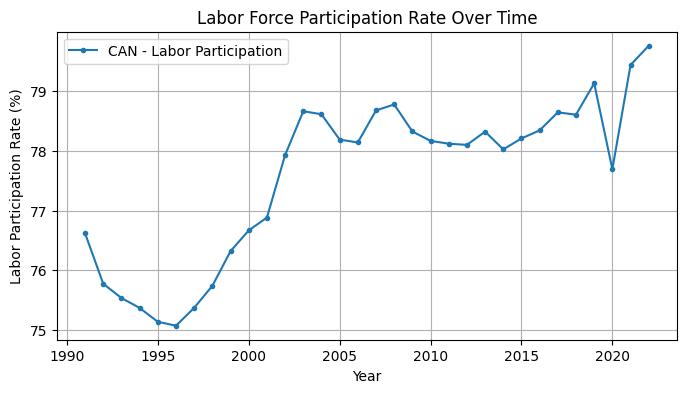

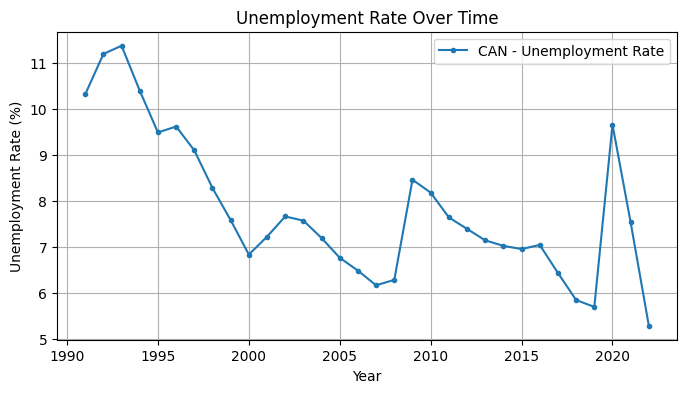

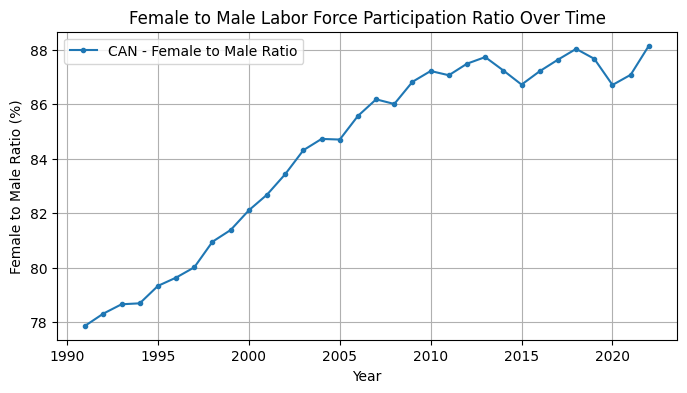

In [5]:
import matplotlib.pyplot as plt

# set plot size
plt.figure(figsize=(8, 4))

# set the time series for the plot

plt.plot(can_df['Year'], can_df['Labor_Participation'], label='CAN - Labor Participation', linestyle='-', marker='.')

# set the lable and title
plt.title('Labor Force Participation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Labor Participation Rate (%)')
plt.legend()
plt.grid(True)

plt.show()

# set plot size
plt.figure(figsize=(8, 4))

# set the time series for the plot

plt.plot(can_df['Year'], can_df['Unemployment_Rate'], label='CAN - Unemployment Rate', linestyle='-', marker='.')

# set the lable adn title
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)


plt.show()

# set plot size
plt.figure(figsize=(8, 4))

# set the time series for the plot

plt.plot(can_df['Year'], can_df['Female_Male_Ratio'], label='CAN - Female to Male Ratio', linestyle='-', marker='.')

# set the lable adn title
plt.title('Female to Male Labor Force Participation Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Female to Male Ratio (%)')
plt.legend()
plt.grid(True)

plt.show()



## **Part 3: Modeling & Prediction**
---

### **3.1 Data preperation for Prediction**
**After reviewing the data trends, I found that**
- There have been significant unexpected changes in the data for **2020** and **2021** (*possibly due to the pandemic*). 
- In order to avoid affecting the overall trend of the data and subsequent modeling, I decided to use the smooth changes from 2019 to 2022 to replace the original data.

In [6]:

# replace the outlier
for col in ['Unemployment_Rate', 'Labor_Participation',"Female_Male_Ratio"]:
    # abstract the data for 2019 and 2022
    val_2019 = can_df.loc[can_df['Year'] == 2019, col].values[0]
    val_2022 = can_df.loc[can_df['Year'] == 2022, col].values[0]
    
    # caculate the smooth change value
    step = (val_2022 - val_2019) / 3  
    
    # replace the data for 2020 and 2021
    can_df.loc[can_df['Year'] == 2020, col] = val_2019 + step
    can_df.loc[can_df['Year'] == 2021, col] = val_2019 + 2 * step

can_df.to_csv("can_df.csv", index=False)


### **3.2 Set Traing set and Testing set**
- Divide the data by 2015

In [7]:
# defined the devide line for testing set and training set
train_end_year = 2015
# devide the data 
can_train = can_df[can_df['Year'] <= train_end_year]
can_test = can_df[can_df['Year'] > train_end_year]

### **3.3 Do the Test on the prepared data frame**
- **Do the Test on the prepared data frame to make sure it suit for ARIMA & SARIMA model.**

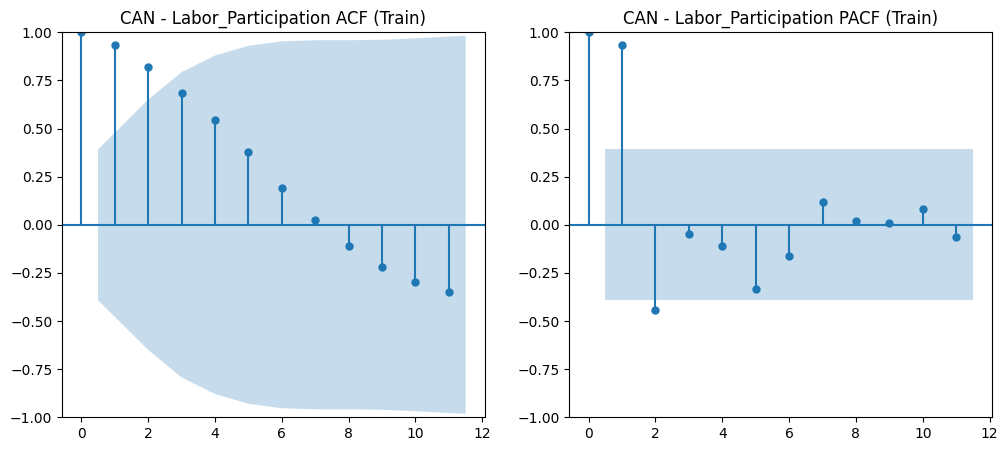

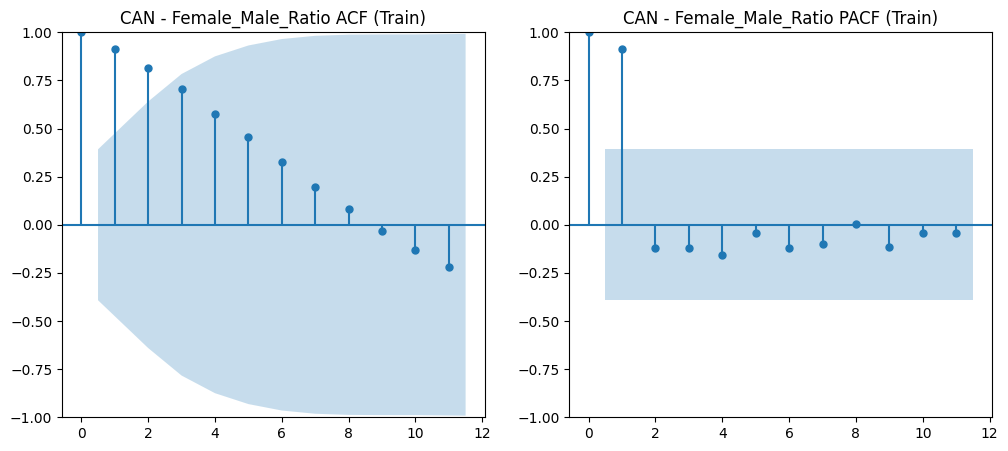

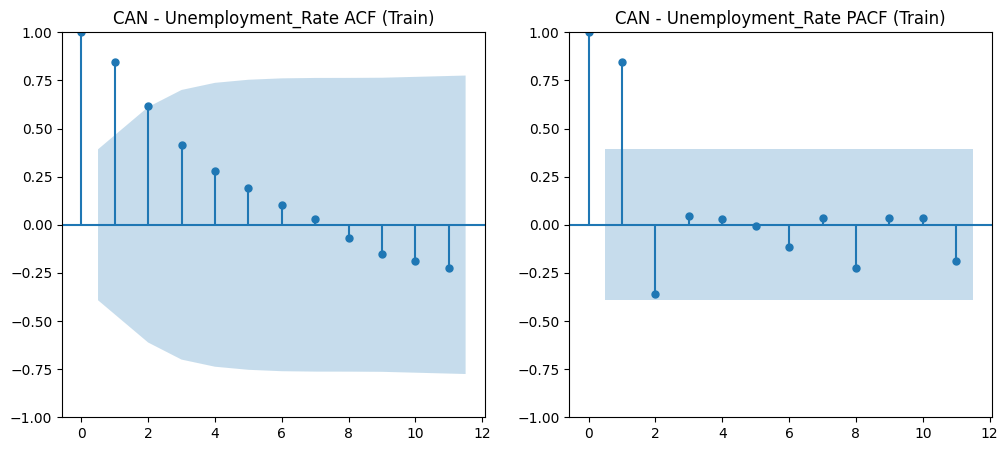

,Country,Variable,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,CAN,Labor_Participation,-1.137944,0.699705,-3.769733,-3.005426,-2.642501
1,CAN,Female_Male_Ratio,-2.684450,0.076768,-3.788386,-3.013098,-2.646397
2,CAN,Unemployment_Rate,-2.461565,0.125108,-3.752928,-2.998500,-2.638967


In [8]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#  Apply ACF/ PACF/ ADF test no the training set 
train_results = {}
for country, df in [("CAN", can_train)]:
    train_results[country] = {}
    for var in ["Labor_Participation", "Female_Male_Ratio", "Unemployment_Rate"]:
        series = df[var].dropna()  # make sure there is no null value
        max_lag = min(len(series) // 2 - 1, 15)  # set the lag data

        # ADF
        adf_test = adfuller(series)
        adf_result = {
            "ADF Statistic": adf_test[0],
            "p-value": adf_test[1],
            "Critical Values": adf_test[4]
        }
        train_results[country][var] = adf_result

        # ACF + PACF 
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        plot_acf(series, ax=axes[0], lags=max_lag)
        plot_pacf(series, ax=axes[1], lags=max_lag, method="ywm") 
        axes[0].set_title(f"{country} - {var} ACF (Train)")
        axes[1].set_title(f"{country} - {var} PACF (Train)")
        plt.show()

data = []
for country, variables in train_results.items():
    for var, stats in variables.items():
        row = {
            'Country': country,
            'Variable': var,
            'ADF Statistic': stats['ADF Statistic'],
            'p-value': stats['p-value'],
            'Critical Value (1%)': stats['Critical Values']['1%'],
            'Critical Value (5%)': stats['Critical Values']['5%'],
            'Critical Value (10%)': stats['Critical Values']['10%']
        }
        data.append(row)

# result DataFrame
adf_df = pd.DataFrame(data)
adf_df

### **3.4 Do the Difference base on the Result**
- From above result, we can see, the data is **unstable**, need to apply the **Difference** before do the Prediction.

In [9]:
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
# set the data that need 1st difference
diff_variables = {
    "CAN": ["Labor_Participation", "Female_Male_Ratio", "Unemployment_Rate"]
}

# 1st difference
for country, df in [ ("CAN", can_train)]:
    for var in diff_variables[country]:
        df[f"{var}_diff"] = df[var].diff()  

# ADF 
diff_train_results = {}
for country, df in [ ("CAN", can_train)]:
    diff_train_results[country] = {}
    for var in diff_variables[country]:
        series_diff = df[f"{var}_diff"].dropna() 

        # ADF
        adf_test = adfuller(series_diff)
        adf_result = {
            "ADF Statistic": adf_test[0],
            "p-value": adf_test[1],
            "Critical Values": adf_test[4]
        }
        diff_train_results[country][f"{var}_diff"] = adf_result

data = []
for country, variables in diff_train_results.items():
    for var, stats in variables.items():
        row = {
            'Variable': var,
            'ADF Statistic': stats['ADF Statistic'],
            'p-value': stats['p-value'],
            'Critical Value (1%)': stats['Critical Values']['1%'],
            'Critical Value (5%)': stats['Critical Values']['5%'],
            'Critical Value (10%)': stats['Critical Values']['10%']
        }
        data.append(row)

#result DataFrame
adf_df = pd.DataFrame(data)
adf_df

C:\Users\weika\AppData\Local\Temp\ipykernel_171676\2585274856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{var}_diff"] = df[var].diff()
C:\Users\weika\AppData\Local\Temp\ipykernel_171676\2585274856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{var}_diff"] = df[var].diff()
C:\Users\weika\AppData\Local\Temp\ipykernel_171676\2585274856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Variable,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,Labor_Participation_diff,-1.932166,0.317084,-3.859073,-3.042046,-2.660906
1,Female_Male_Ratio_diff,0.612810,0.987927,-3.788386,-3.013098,-2.646397
2,Unemployment_Rate_diff,-1.914638,0.325206,-4.012034,-3.104184,-2.690987


### **The result is still unstable**

- **Try 2nd time difference**

In [10]:
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
# set the data that need 2nd difference
diff2_variables = {
    "CAN": ["Labor_Participation", "Female_Male_Ratio", "Unemployment_Rate"]
}

# end differnece
for country, df in [("CAN", can_train)]:
    for var in diff2_variables[country]:
        df[f"{var}_diff2"] = df[f"{var}_diff"].diff()

# ADF
diff2_train_results = {}
for country, df in [ ("CAN", can_train)]:
    diff2_train_results[country] = {}
    for var in diff2_variables[country]:
        series_diff2 = df[f"{var}_diff2"].dropna() 

        # ADF
        adf_test = adfuller(series_diff2)
        adf_result = {
            "ADF Statistic": adf_test[0],
            "p-value": adf_test[1],
            "Critical Values": adf_test[4]
        }
        diff2_train_results[country][f"{var}_diff2"] = adf_result


data = []
for country, variables in diff2_train_results.items():
    for var, stats in variables.items():
        row = {
            'Variable': var,
            'ADF Statistic': stats['ADF Statistic'],
            'p-value': stats['p-value'],
            'Critical Value (1%)': stats['Critical Values']['1%'],
            'Critical Value (5%)': stats['Critical Values']['5%'],
            'Critical Value (10%)': stats['Critical Values']['10%']
        }
        data.append(row)

# result DataFrame
adf_df = pd.DataFrame(data)
adf_df

C:\Users\weika\AppData\Local\Temp\ipykernel_171676\120917615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{var}_diff2"] = df[f"{var}_diff"].diff()
C:\Users\weika\AppData\Local\Temp\ipykernel_171676\120917615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{var}_diff2"] = df[f"{var}_diff"].diff()
C:\Users\weika\AppData\Local\Temp\ipykernel_171676\120917615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,Variable,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,Labor_Participation_diff2,-3.766821,3.265612e-03,-3.809209,-3.021645,-2.650713
1,Female_Male_Ratio_diff2,-8.896708,1.201492e-14,-3.788386,-3.013098,-2.646397
2,Unemployment_Rate_diff2,-2.759428,6.430691e-02,-3.924019,-3.068498,-2.673893


### **3.5 Apply ARIMA with Training set**
- Base on the Difference time, the `d value` for `ARIMA` should be set to 2.
- The **test set** is predicted based on the **training set**, and the **test accuracy** is initially determined based on the visualization.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# function to caculate the  MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# set p, d, q value
params = {
    
    "CAN": {
        "Labor_Participation": (4, 2, 4),
        "Female_Male_Ratio": (2, 2, 2),
        "Unemployment_Rate": (4, 2, 4),
    }
}

# Train the ARIMA Model，Caculat AIC BIC MAPE
results = {}
for country, train_df, test_df in [ ("CAN", can_train, can_test)]:
    results[country] = {}
    for var in params[country]:
        p, d, q = params[country][var]

        try:
            model = sm.tsa.ARIMA(train_df[var], order=(p, d, q))
            fitted_model = model.fit()
            aic = fitted_model.aic
            bic = fitted_model.bic
            mape = mean_absolute_percentage_error(test_df[var].values, forecast.values)
            results[country][var] = { "AIC": aic}

            # Prediction (2016-2022)
            forecast = fitted_model.forecast(steps=len(test_df))
            

            results[country][var] = {
                "AIC": aic, "BIC": bic, "MAPE": mape
            }
            
            # plot the result
            plt.figure(figsize=(8, 4))
            plt.plot(train_df['Year'], train_df[var], label="Training Data", marker='.')
            plt.plot(test_df['Year'], test_df[var], label="Actual Data", linestyle="dotted")
            plt.plot(test_df['Year'], forecast, label="Forecast", linestyle="dashed")
            plt.title(f"{country} - {var} (ARIMA({p},{d},{q}))")
            plt.xticks(train_df['Year'].tolist() + test_df['Year'].tolist(), rotation=45)  # 确保所有年份可见
            plt.xlabel("Year")
            plt.ylabel(var)
            plt.legend()
            plt.grid(True)
            plt.show()

        except Exception as e:
            results[country][var] = {"Error": str(e)}
import pandas as pd
results_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                                     for i in results.keys() 
                                     for j in results[i].keys()}, orient='index')

results_df

Error
CAN Labor_Participation  name 'forecast' is not defined
    Female_Male_Ratio    name 'forecast' is not defined
    Unemployment_Rate    name 'forecast' is not defined

### **3.6 Join SARIMA in the Model**
- We initially used `ADF`/`ACF`/`PACF` to select the parameters `(p,d,q)`but found that d=2 oversimplified the long-term trend of `Female_Male_Ratio`, resulting in large prediction errors.
- We then adjusted d=0 and optimized `p`/`q`,by observing the data trend, and finally obtained `SARIMAX(2,0,2)(1,1,1,5)`, which **performed better on the test set**. 
- Therefore, our parameter selection combines statistical methods and data fitting results to ensure the accuracy of the prediction.”

### **Explaination**
- Initial selection (p,d,q) based on statistical tools
    - ADF test: determine d, if data is non-stationary then differencing is required.
    - ACF/PACF: used to select p, qbut can be misleading.

- Why does ACF/PACF selection of parameters not work well?
    - Limited sample problem: ACF/PACF is more likely to err in small samples, especially if the data has structural changes.
    - Over-difference problem: d=2 may over-eliminate long-term trends, leading to incorrect prediction of trends.
    
- How can parameters be optimised?
    - Adjust parameters based on the fitting effect of the test set:
    - If d=2 makes the trend disappear, try d=0.
    - If the ACF/PACF predicts q=4 as overfitting, reduce q.
    - If the test set performs better, the new parameters are more in line with the data structure.

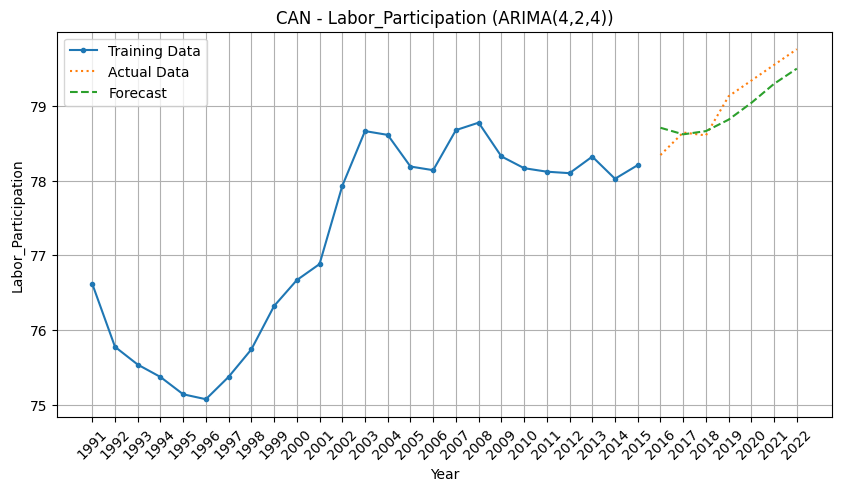

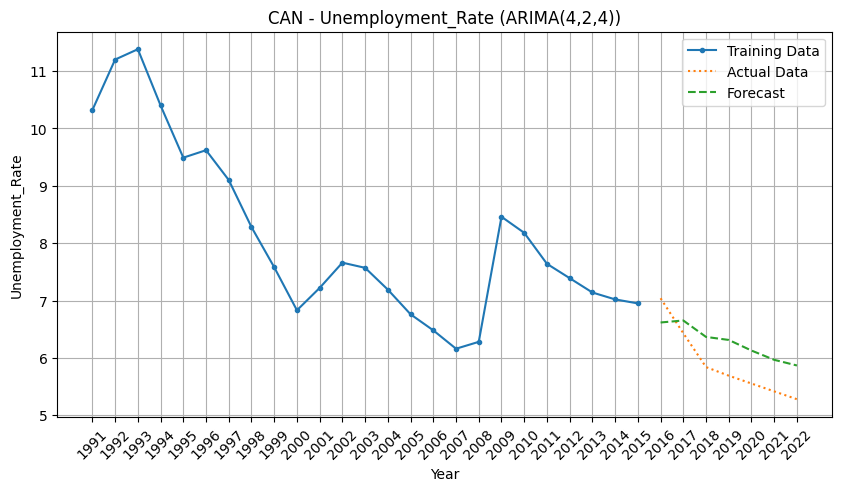

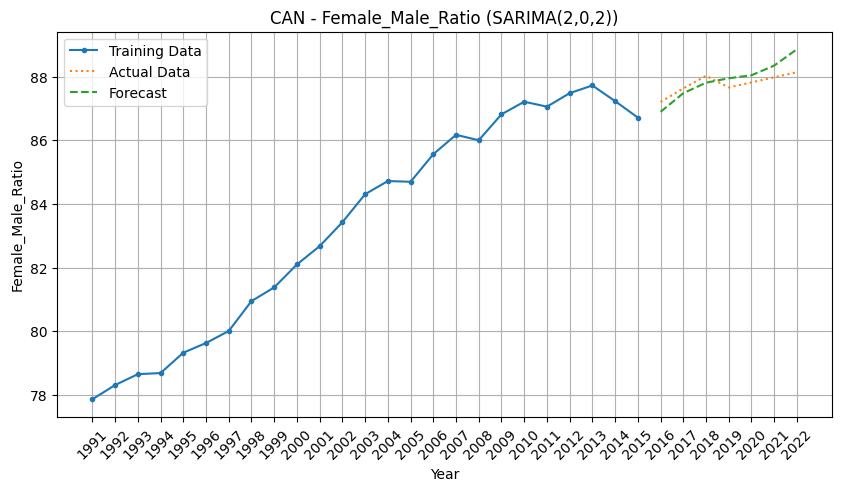

AIC        BIC      MAPE
CAN Labor_Participation  29.588912  39.808359  0.284135
    Unemployment_Rate    63.853438  74.072886  8.722011
    Female_Male_Ratio    43.191844  50.161970  0.370157

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np



# set (p, d, q) 
manual_params = {
    "CAN": {
        "Labor_Participation": (4, 2, 4),  # ARIMA(p, d, q)
        "Unemployment_Rate": (4, 2, 4),   # ARIMA(p, d, q)
        "Female_Male_Ratio": (2, 0, 2, 1, 1, 1, 5)  # SARIMA(p, d, q)(P, D, Q, s)
    }
}

# Train ARIMA and SARIMA Model，Caculate AIC、BIC、MAPE, visualize the predeiction result
results = {}

for country, train_df, test_df in [("CAN", can_train, can_test)]:
    results[country] = {}

    for var in manual_params[country]:
        params = manual_params[country][var]

        try:
            if var == "Female_Male_Ratio":
                # SARIMA
                p, d, q, P, D, Q, s = params  
                model = SARIMAX(train_df[var], 
                                order=(p, d, q),  
                                seasonal_order=(P, D, Q, s))  
            else:
                # ARIMA
                p, d, q = params  
                model = sm.tsa.ARIMA(train_df[var], order=(p, d, q))

            # AIC、BIC、
            fitted_model = model.fit()
            aic = fitted_model.aic
            bic = fitted_model.bic

            # Prediction (2016-2022)
            forecast = fitted_model.forecast(steps=len(test_df))

            # MAPE
            mape = mean_absolute_percentage_error(test_df[var].values, forecast.values)

            # save AIC、BIC、MAPE result
            results[country][var] = {
                "AIC": aic, "BIC": bic, "MAPE": mape
            }

            # visualize the predeiction result
            plt.figure(figsize=(10, 5))
            plt.plot(train_df['Year'], train_df[var], label="Training Data", marker='.')
            plt.plot(test_df['Year'], test_df[var], label="Actual Data", linestyle="dotted")
            plt.plot(test_df['Year'], forecast, label="Forecast", linestyle="dashed")
            plt.title(f"{country} - {var} ({'SARIMA' if var == 'Female_Male_Ratio' else 'ARIMA'}({p},{d},{q}))")
            plt.xticks(train_df['Year'].tolist() + test_df['Year'].tolist(), rotation=45)
            plt.xlabel("Year")
            plt.ylabel(var)
            plt.legend()
            plt.grid(True)
            plt.show()

        except Exception as e:
            results[country][var] = {"Error": str(e)}

# present AIC、BIC、MAPE by formated data frame
import pandas as pd
results_df = pd.DataFrame.from_dict({(i,j): results[i][j] 
                                     for i in results.keys() 
                                     for j in results[i].keys()}, orient='index')

results_df

### **3.7 Predic the Feature data by Model**

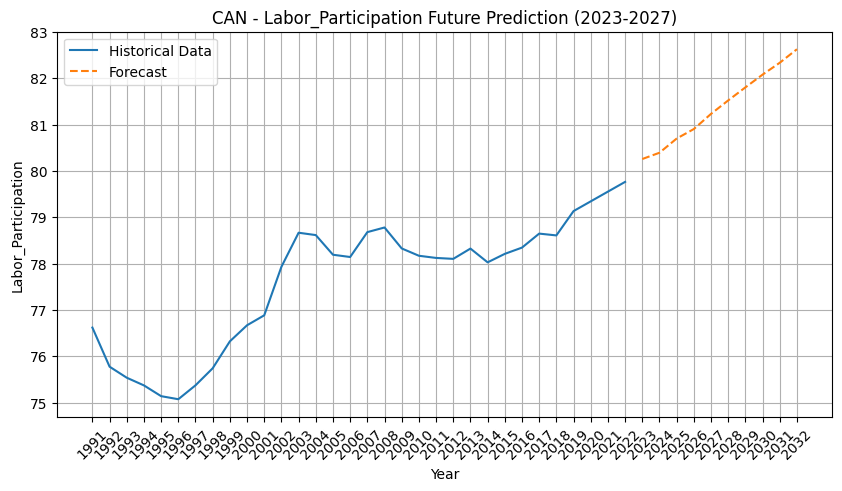

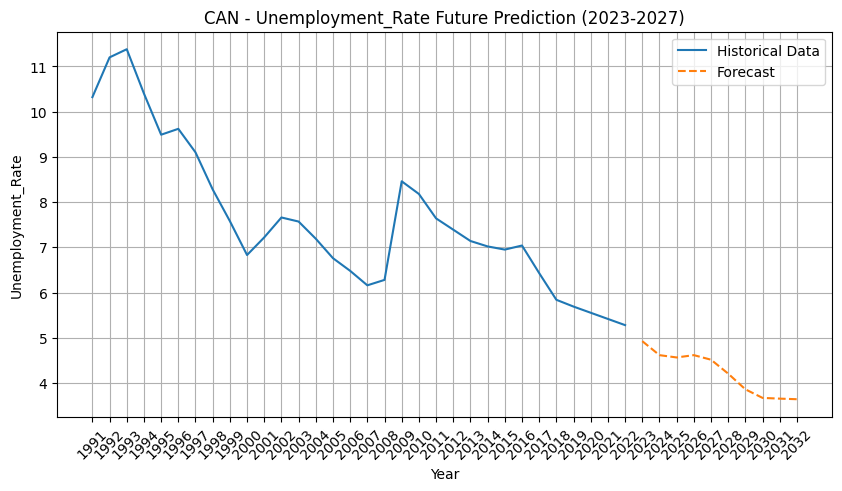

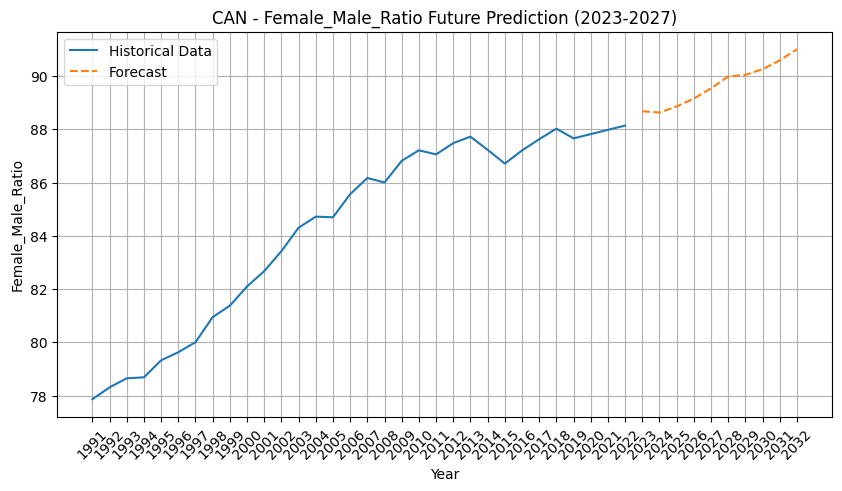

,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032
"(CAN, Labor_Participation)",80.255747,80.391001,80.697278,80.902628,81.229765,81.520222,81.801898,82.076857,82.333132,82.625168
"(CAN, Unemployment_Rate)",4.925245,4.616115,4.565184,4.616444,4.515371,4.207041,3.860485,3.670998,3.654843,3.641889
"(CAN, Female_Male_Ratio)",88.677478,88.630219,88.859953,89.155483,89.539470,89.983167,90.043324,90.259088,90.591547,91.008219


In [13]:
# feature 10 year (2023-2033)
future_steps = 10
future_years = list(range(2023, 2033))

# for save the Predict result
future_forecasts = {}

for country, df in [("CAN", can_df)]:
    future_forecasts[country] = {}

    for var in manual_params[country]:
        params = manual_params[country][var]

        try:
            if var == "Female_Male_Ratio":
                # SARIMA
                p, d, q, P, D, Q, s = params
                model = SARIMAX(df[var], 
                                order=(p, d, q),  
                                seasonal_order=(P, D, Q, s))  
            else:
                # ARIMA
                p, d, q = params
                model = sm.tsa.ARIMA(df[var], order=(p, d, q))

            # fit the model
            fitted_model = model.fit()

            # Prediction
            forecast = fitted_model.forecast(steps=future_steps)
            future_forecasts[country][var] = forecast.values

            # visualize the result
            plt.figure(figsize=(10, 5))
            plt.plot(df['Year'], df[var], label="Historical Data")
            plt.plot(future_years, forecast, label="Forecast", linestyle="dashed")
            plt.title(f"{country} - {var} Future Prediction (2023-2027)")
            plt.xticks(list(df['Year']) + future_years, rotation=45)
            plt.xlabel("Year")
            plt.ylabel(var)
            plt.legend()
            plt.grid(True)
            plt.show()

        except Exception as e:
            future_forecasts[country][var] = {"Error": str(e)}


future_forecasts_df = pd.DataFrame.from_dict({(i,j): future_forecasts[i][j] 
                                              for i in future_forecasts.keys() 
                                              for j in future_forecasts[i].keys()}, orient='index',
                                             columns=future_years)
future_forecasts_df

